#Clean

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

df = pd.read_csv('https://raw.githubusercontent.com/mchosasih99/dataset/main/marketing_campaign_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## Drop Unnecessary Columns

In [4]:
df.duplicated().sum()

0

In [5]:
#Drop columns
df.drop(columns=(['Unnamed: 0', 'Z_CostContact','Z_Revenue','ID']), inplace=True)

## Extract Columns

In [6]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,0


In [7]:
#Extract Columns

df['age'] = 2022 - df['Year_Birth']
df['kids'] = df['Kidhome'] + df['Teenhome']
df['total_transactions'] = df['MntCoke'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['total_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Campaign_Acc'] = df['AcceptedCmp1'] + df['AcceptedCmp2']+ df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] 

df.drop(['Kidhome', 'Teenhome', 'Year_Birth'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


## Extract Membership Column

In [8]:
# Extract Membership Column

df['today'] = pd.to_datetime("today")
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['member_years'] = ((((df['today'] - df['Dt_Customer']).dt.days).astype(int))/365).round(2)
df.drop(columns=(['today', 'Dt_Customer']), inplace=True)

In [9]:
df.member_years.describe()

count    2240.000000
mean        8.937174
std         0.636220
min         7.530000
25%         8.470000
50%         8.940000
75%         9.410000
max        10.450000
Name: member_years, dtype: float64

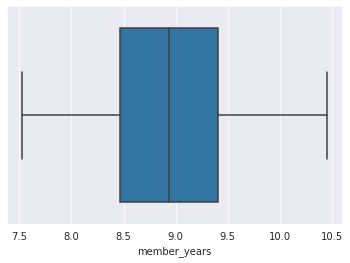

In [10]:
sns.boxplot(x=df['member_years'])

In [11]:
#Categorize consumers based on the length of time they have been members
df['member_category'] = np.where(df.member_years > 9.4, 'loyal',
                                       np.where(df.member_years <8.45, 'new','average'))
df.drop('member_years', axis=1,inplace=True)

## Modify Martial Status

In [12]:
df.Marital_Status.unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace({'Lajang':'Single',
                                                                 'Cerai':'Single',
                                                                 'Janda': 'Single',
                                                                 'Duda': 'Single',
                                                                 'Bertunangan': 'In Relationship',
                                                                 'Menikah': 'In Relationship'})

In [14]:
df.shape

(2240, 28)

## Handle Outliers

In [15]:
df.describe()

,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,kids,total_transactions,total_purchases,Campaign_Acc
count,2.216000e+03,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000
mean,5.224725e+07,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,53.194196,0.950446,6.057982e+05,12.537054,0.297768
std,2.517308e+07,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.751803,6.022493e+05,7.205741,0.678381
min,1.730000e+06,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,5.000000e+03,0.000000,0.000000
25%,3.530300e+07,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,6.875000e+04,6.000000,0.000000
50%,5.138150e+07,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,1.000000,3.960000e+05,12.000000,0.000000
75%,6.852200e+07,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,1.045500e+06,18.000000,0.000000
max,6.666660e+08,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,3.000000,2.525000e+06,32.000000,4.000000


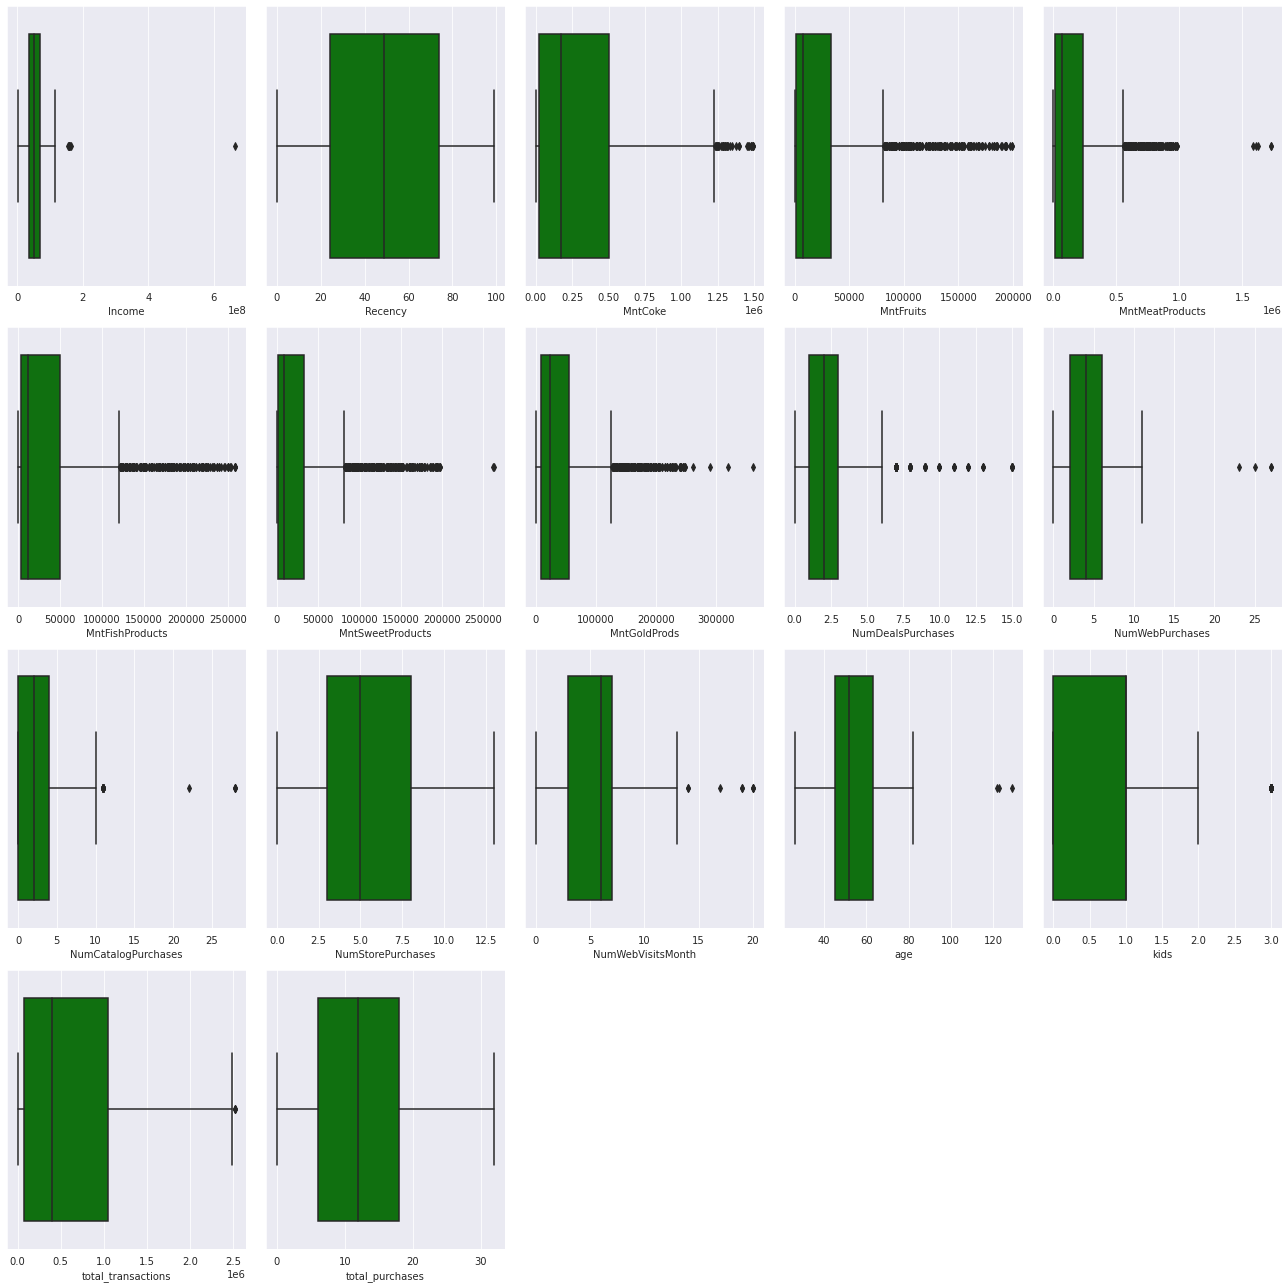

In [16]:
#Visualize outliers in numeric columns with boxplot
boxplot = ['Income','Recency','MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'age','kids', 'total_transactions','total_purchases']

plt.figure(figsize=(18,18))
for i in range(0, len(boxplot)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=df[boxplot[i]], color='green')
    plt.tight_layout()


We will handle outliers only in Income and Age columns, because the value seems unusual.

In [17]:
#Position of the Outlier
print(np.where(df['Income']>150000000))

(array([ 164,  617,  655,  687, 1300, 1653, 2132, 2233]),)


In [18]:
#Drop row that have outliers
df = df.drop([164,  617,  655,  687, 1300, 1653, 2132, 2233])
df.shape

(2232, 28)

In [19]:
#Fill null(on Income) and odd value (on Year_Birth)
df['Income'] = df['Income'].fillna(df['Income'].median())
df = df[df['age'] < 120]
df.shape

(2229, 28)

## Feature Encoding

In [20]:
df_label = df.copy()
df_label.head()

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,kids,total_transactions,total_purchases,Campaign_Acc,member_category
0,S1,Single,58138000.0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,65,0,1617000,22,0,loyal
1,S1,Single,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,68,2,27000,4,0,new
2,S1,In Relationship,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,57,0,776000,20,0,average
3,S1,In Relationship,26646000.0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,38,1,53000,6,0,new
4,S3,In Relationship,58293000.0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,41,1,422000,14,0,new


In [21]:
label_encoding = {"Education": {'SMA':0,'D3':1,'S1':2, "S2": 3, "S3": 4},
                  "Marital_Status": {'Single':0, 'In Relationship':1},
                  "member_category": {'new':0, 'average':1, 'loyal':2}}

df_label[['Education', 'Marital_Status', 'member_category']]=df_label[['Education', 'Marital_Status', 'member_category']].replace(label_encoding)

## Selecting Features (RFM Analysis)

In [22]:
df_select = df_label[['Recency',	'MntCoke',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	
                'MntSweetProducts',	'MntGoldProds',	'NumDealsPurchases',	'NumWebPurchases',
                'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth',	
                'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',
                'AcceptedCmp2','total_transactions',	'total_purchases',
                'Campaign_Acc',	'member_category']].copy()
df_select.head()

,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,total_transactions,total_purchases,Campaign_Acc,member_category
0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,1617000,22,0,2
1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,27000,4,0,0
2,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,776000,20,0,1
3,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,53000,6,0,0
4,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,422000,14,0,0


In [23]:
# Dimension reduction 1
# Recency

from sklearn.decomposition import PCA

recency = ['Recency', 'member_category']
pca1 = PCA(n_components=1)
pca1.fit(df_select[recency])
df_pca1 = pd.DataFrame(pca1.transform(df_select[recency]))
df_pca1.rename(columns={0:'recency'}, inplace=True)

pca1.explained_variance_ratio_

array([0.99940861])

99% of information is still stored using PCA.

In [24]:
# Dimension reduction 2
# Frequency

frequency = ['NumDealsPurchases',	'NumWebPurchases',
             'NumCatalogPurchases','NumStorePurchases',
             'NumWebVisitsMonth','total_purchases']
pca2 = PCA(n_components=1)
pca2.fit(df_select[frequency])
df_pca2 = pd.DataFrame(pca2.transform(df_select[frequency]))
df_pca2.rename(columns={0:'frequency'}, inplace=True)

pca2.explained_variance_ratio_

array([0.80718373])

80% of information is still stored using PCA.

In [25]:
# Dimension reduction 3
# Monetary

monetary = ['MntCoke',	'MntFruits',	
            'MntMeatProducts',	'MntFishProducts',	
            'MntSweetProducts',	'MntGoldProds', 
            'total_transactions']
pca3 = PCA(n_components=1)
pca3.fit(df_select[monetary])
df_pca3 = pd.DataFrame(pca3.transform(df_select[monetary]))
df_pca3.rename(columns={0:'monetary'}, inplace=True)

pca3.explained_variance_ratio_

array([0.9259048])

92% of information is still stored using PCA.

In [26]:
# Join into new dataframe
df_pca = df_pca1.join(df_pca2)
df_pca = df_pca.join(df_pca3)
df_pca

,recency,frequency,monetary
0,8.894340,10.224120,1.122056e+06
1,-11.107011,-9.782815,-6.708705e+05
2,-23.106330,8.746494,1.931047e+05
3,-23.107008,-7.548171,-6.444721e+05
4,44.892976,1.730282,-2.276807e+05
...,...,...,...
2224,-3.106335,3.702524,8.228772e+05
2225,6.892985,2.504747,-1.338051e+05
2226,41.892977,6.548507,8.221766e+05
2227,-41.107004,10.064480,2.729111e+05


## Standardization

In [27]:
df_standard = df_pca.copy()
standard = ['recency', 'frequency', 'monetary']

In [28]:
from sklearn.preprocessing import StandardScaler
df_standard[standard] = StandardScaler().fit_transform(df_standard[standard].values.reshape(len(df_standard),3))

In [29]:
df_standard

,recency,frequency,monetary
0,0.307337,1.220083,1.599462
1,-0.383795,-1.167420,-0.956309
2,-0.798422,1.043752,0.275266
3,-0.798446,-0.900752,-0.918679
4,1.551244,0.206481,-0.324553
...,...,...,...
2224,-0.107337,0.441836,1.172991
2225,0.238182,0.298901,-0.190736
2226,1.447581,0.781458,1.171992
2227,-1.420422,1.201032,0.389028


# Data Modeling

## Elbow Method

Elbow Method to determine the number of clusters to be formed:


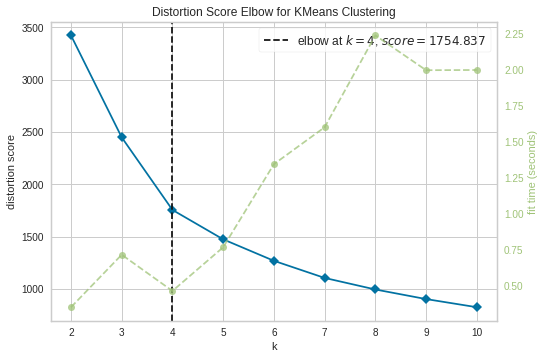

In [30]:

print('Elbow Method to determine the number of clusters to be formed:')

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_standard)
Elbow_M.show()

The optimal number of clusters using the Elbow Method is 4.

## Clustering

In [31]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=4, random_state=0).fit(df_standard)

In [32]:
df_standard['segment'] = cluster.labels_
df_standard

,recency,frequency,monetary,segment
0,0.307337,1.220083,1.599462,2
1,-0.383795,-1.167420,-0.956309,1
2,-0.798422,1.043752,0.275266,3
3,-0.798446,-0.900752,-0.918679,1
4,1.551244,0.206481,-0.324553,0
...,...,...,...,...
2224,-0.107337,0.441836,1.172991,3
2225,0.238182,0.298901,-0.190736,0
2226,1.447581,0.781458,1.171992,2
2227,-1.420422,1.201032,0.389028,3


## Silhouette Score

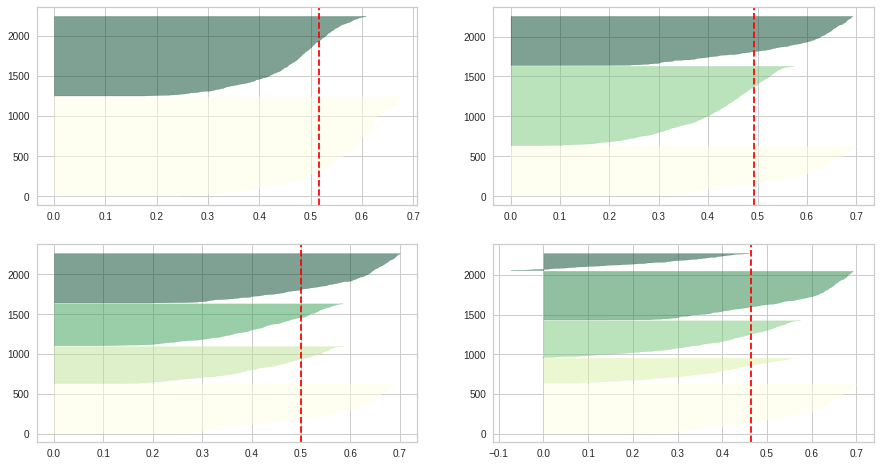

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='YlGn', ax=ax[q-1][mod])
    visualizer.fit(df_standard)

From the silhouette score, the optimum number of clusters is 4. The average coefficient is about 0.5, there is no cluster that has a silhouette score value below the average and the thickness of the four clusters is not too much different. This indicates that the clustering model can distinguish cluster classes from one another.

## Visualize Clusters

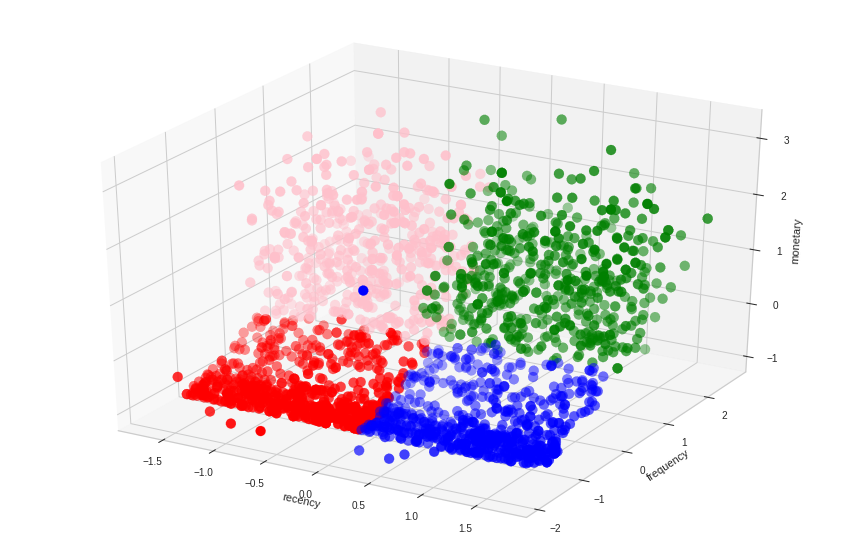

In [34]:
# Static Viz

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_standard['recency'][df_standard.segment == 0], df_standard["frequency"][df_standard.segment == 0], df_standard["monetary"][df_standard.segment == 0], c='blue', s=100, edgecolor='blue',linestyle='--')
ax.scatter(df_standard['recency'][df_standard.segment == 1], df_standard["frequency"][df_standard.segment == 1], df_standard["monetary"][df_standard.segment == 1], c='red', s=100, edgecolor='red',linestyle='--')
ax.scatter(df_standard['recency'][df_standard.segment == 2], df_standard["frequency"][df_standard.segment == 2], df_standard["monetary"][df_standard.segment == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_standard['recency'][df_standard.segment == 3], df_standard["frequency"][df_standard.segment == 3], df_standard["monetary"][df_standard.segment == 3], c='pink', s=100, edgecolor='pink',linestyle='--')



plt.xlabel('recency')
plt.ylabel("frequency")
ax.set_zlabel('monetary')
plt.show()

In [35]:
#Simple Interactive Viz

import plotly.express as px
df_3d = df_standard
fig = px.scatter_3d(df_3d, x='recency', y='frequency', z='monetary',
              color='segment')
fig.show()

# Marketing Retargeting

In [36]:
# Setting colors for each segment
pal = ["#A5E1AD","#357C3C", "#9D4DFF","#21094E"]

## Snake Plot

In [37]:
df_standard

,recency,frequency,monetary,segment
0,0.307337,1.220083,1.599462,2
1,-0.383795,-1.167420,-0.956309,1
2,-0.798422,1.043752,0.275266,3
3,-0.798446,-0.900752,-0.918679,1
4,1.551244,0.206481,-0.324553,0
...,...,...,...,...
2224,-0.107337,0.441836,1.172991,3
2225,0.238182,0.298901,-0.190736,0
2226,1.447581,0.781458,1.171992,2
2227,-1.420422,1.201032,0.389028,3


In [38]:
#Find the average RFM of each segment

rfm_avg = df_standard.groupby('segment').agg({'recency':'mean',
                                             'frequency': 'mean',
                                             'monetary':'mean'}).reset_index()
rfm_avg

,segment,recency,frequency,monetary
0,0,0.871194,-0.749525,-0.745728
1,1,-0.852810,-0.797014,-0.772223
2,2,0.808780,0.971060,0.996467
3,3,-0.928092,0.956886,0.889907


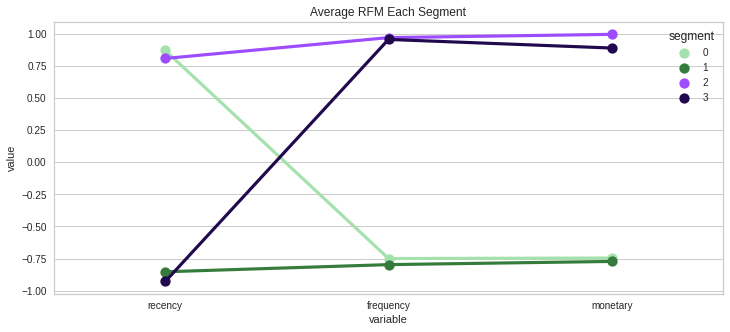

In [39]:
# Snake plot
snake_plot = pd.melt(rfm_avg, id_vars='segment', value_vars=['recency', 'frequency', 'monetary'])

plt.figure(figsize=(12,5))
sns.pointplot(x="variable", y="value", hue="segment",
                   data=snake_plot, palette=pal)
plt.title('Average RFM Each Segment')
plt.show()

- **Segment 0 :** Recency high, frequency and monetary low.

- **Segment 1 :** Recency, frequency and monetary low. 

- **Segment 2 :** Recency, frequency and monetary high.

- **Segment 3 :** Recency low, frequency and monetary high.

## Demographics

In [40]:
df_final = df_label.copy()
df_final['segment'] = cluster.labels_
df_final

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,kids,total_transactions,total_purchases,Campaign_Acc,member_category,segment
0,2,0,58138000.0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,65,0,1617000,22,0,2,2
1,2,0,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,68,2,27000,4,0,0,1
2,2,1,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,57,0,776000,20,0,1,3
3,2,1,26646000.0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,38,1,53000,6,0,0,1
4,4,1,58293000.0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,41,1,422000,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223000.0,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,0,55,1,1341000,16,0,1,3
2236,4,1,64014000.0,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,0,76,3,444000,15,1,0,0
2237,2,0,56981000.0,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,0,41,0,1241000,18,1,0,2
2238,3,1,69245000.0,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,0,66,1,843000,21,0,0,3


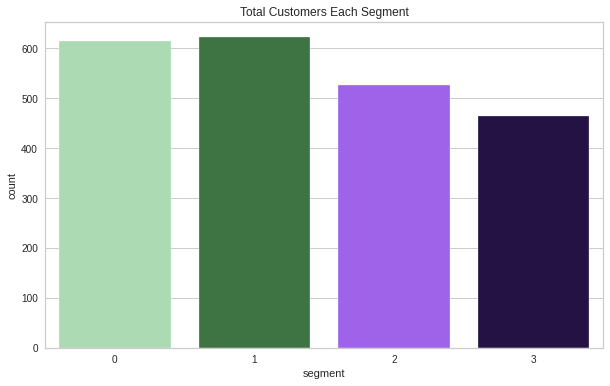

In [41]:
#Plotting countplot of segment

plt.figure(figsize=(10,6))
sns.countplot(x=df_final["segment"], palette= pal)
plt.title("Total Customers Each Segment")
plt.show()

- There is no big difference in the number of segments per consumer.

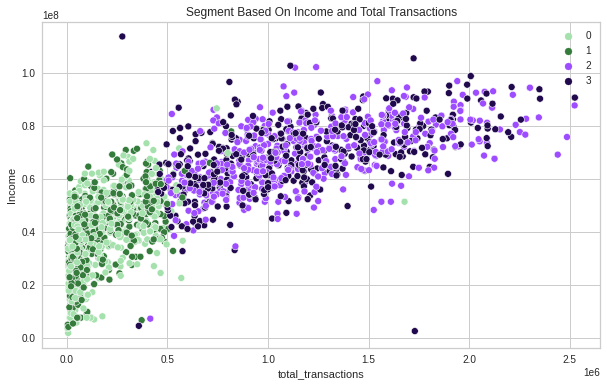

In [42]:
# Segment relationship with Income and Total Transactions

plt.figure(figsize=(10,6))
sns.scatterplot(data = df_final,x="total_transactions", 
                y="Income", hue="segment", palette= pal)
plt.title("Segment Based On Income and Total Transactions")
plt.legend()
plt.show()

- Segment 0 and 1 : Low - Medium Income and Low Total Transactions

- Segment 2 and 3 : Medium - High Income and Total Transactions.

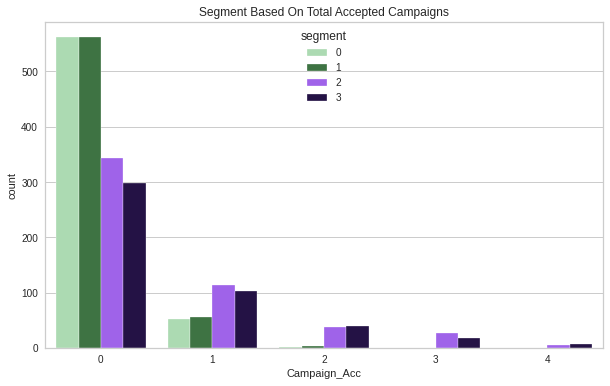

In [43]:
#Plotting count of total campaign accepted.

plt.figure(figsize=(10,6))
sns.countplot(data = df_final, x="Campaign_Acc", hue="segment", palette= pal)
plt.title("Segment Based On Total Accepted Campaigns")
plt.show()

- Most of the consumers in the four segments still did not participate at all in the campaign. And only a few consumers in segment 2 and segment 3 always respond to the campaign.

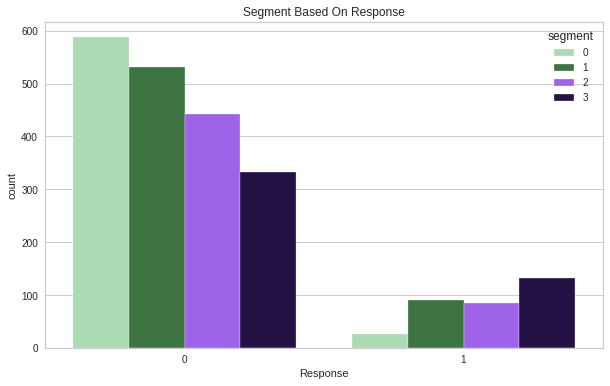

In [44]:
#Plotting count of total response accepted.

plt.figure(figsize=(10,6))
sns.countplot(data = df_final, x = "Response", hue = "segment", palette= pal)
plt.title("Segment Based On Response")
plt.show()

- Segment 0 : Responsiveness to the campaign is very low.

- Segment 1 and Segment 2: Low responsiveness to campaigns.

- Segment 3: Slightly responsive to campaigns.

- In the four consumer segments, the response rate to the latest campaign is still less than half of each segment so that the campaign is still classified as ineffective.

In [45]:
df_final

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,kids,total_transactions,total_purchases,Campaign_Acc,member_category,segment
0,2,0,58138000.0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,65,0,1617000,22,0,2,2
1,2,0,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,68,2,27000,4,0,0,1
2,2,1,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,57,0,776000,20,0,1,3
3,2,1,26646000.0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,38,1,53000,6,0,0,1
4,4,1,58293000.0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,41,1,422000,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223000.0,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,0,55,1,1341000,16,0,1,3
2236,4,1,64014000.0,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,0,76,3,444000,15,1,0,0
2237,2,0,56981000.0,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,0,41,0,1241000,18,1,0,2
2238,3,1,69245000.0,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,0,66,1,843000,21,0,0,3


<Figure size 576x396 with 0 Axes>

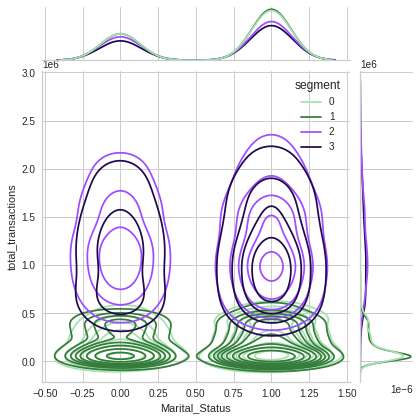

<Figure size 576x396 with 0 Axes>

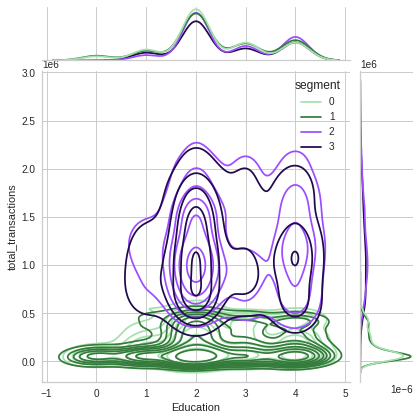

<Figure size 576x396 with 0 Axes>

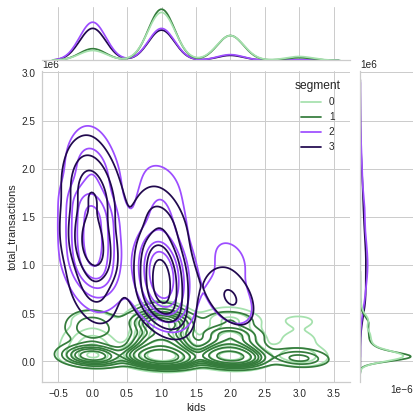

<Figure size 576x396 with 0 Axes>

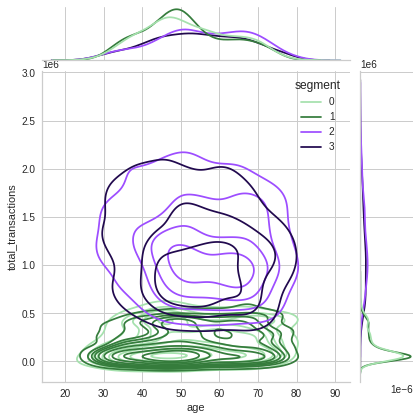

<Figure size 576x396 with 0 Axes>

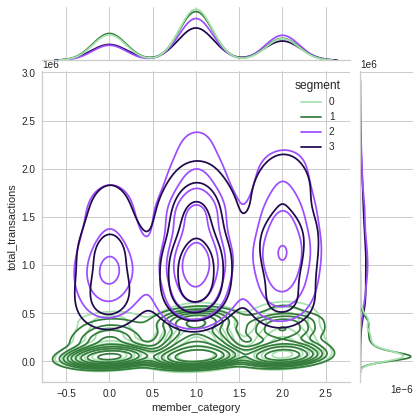

In [46]:
# Visualize Demographic Each Segment

Demographic = [ "Marital_Status", 'Education', 'kids', 'age', 'member_category']

for i in Demographic:
    plt.figure()
    sns.jointplot(x=df_final[i], y=df_final["total_transactions"], hue =df_final["segment"], kind="kde", palette=pal)
    plt.show()

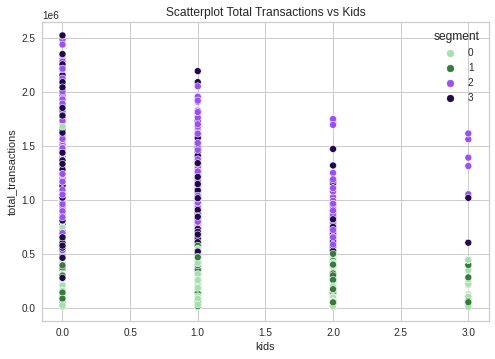

In [47]:
# Total kids and total transactions relationship

sns.scatterplot(data=df_final, x='kids', y='total_transactions', hue='segment', palette=pal)
plt.title('Scatterplot Total Transactions vs Kids')
plt.show()

- There is no difference between segments in terms of age demographics and marital status.

- Segment 2 and Segment 3 are not high school graduates.

- Segment 2 and Segment 3 have a maximum number of 3. With fewer children, the total transaction tends to increase.

- Segment 2 and Segment 3 are loyal consumers (> 9.4 years per 2022).

## Conclusion

### Segment 0

- Recency high
- Low to medium income and low total transactions
- Non-responsive to campaigns
- New and Average member category of customers ( < 9.4 years per 2022)


### Segment 1

- Recency low
- Low to medium income and low total transactions
- Low responsiveness to campaigns
- New and Average member category of customers ( < 9.4 years per 2022)

### Segment 2

- Recency high
- Medium to high income and total transactions
- Low responsiveness to campaigns
- Not SMA (High School) graduates
- Maximum number of kids are 2, fewer children total transactions tends to increase.
- Loyal member category of customers ( > 9.4 years per 2022)

### Segment 3

- Recency low
- Medium to high income and total transactions
- Slightly responsive to campaigns
- Not SMA (High School) graduates
- Maximum number of kids are 2, fewer children total transactions tends to increase.
- Loyal member category of customers ( > 9.4 years per 2022)

**In conclusion, consumers who are suitable to be used as marketing retargeting are consumers who fall into the segment 2 and 3 categories**